In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration and cleaning

In [2]:
data = pd.read_csv('customer_value.csv')
pd.set_option("max_columns", None)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
data['Total Claim Amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [6]:
# Check to see if there are any significant correlations (for continuous variables)
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


The correlation matrix shows that several variables are positively correlated with Total Claim Amount and could be good predictors of the latter:
* Customer Lifetime Value
* Monthly Premium Auto

Other potential variables that show a negative, weak correlation:
* Income
* Number of Open Complaints
* Number of Policies

<AxesSubplot:xlabel='Policy Type', ylabel='Total Claim Amount'>

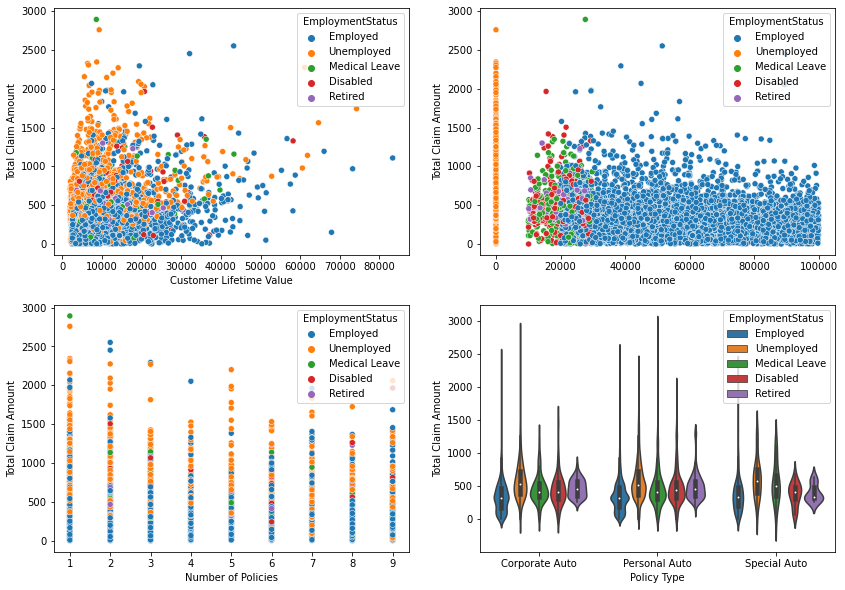

In [7]:
# Try to see if there is a linear relationship between any of the variables with the Total Claim amount
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
sns.scatterplot(
    x='Customer Lifetime Value',
    y='Total Claim Amount',
    hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax[0][0]
)

sns.scatterplot(
    x='Income',
    y='Total Claim Amount',
    hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax[0][1]
)

sns.scatterplot(
    x='Number of Policies',
    y='Total Claim Amount',
    hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax[1][0]
)

sns.violinplot(
    x='Policy Type',
    y='Total Claim Amount',
    hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax[1][1]
)


#### Analysis
There appears to be a **weak, positive linear relationship** between **customer lifetime value** and the total claim amount. However, most values are concentrated around mid to lower levels of claim amounts and customer lifetime value. 
Possible ways to model:
* Linear regression
* Polynomial regression

There does not seem to be any linear relationship between **Income** and the **Number of Policies** with the Total Claim amount. Possible ways to model effect of income and number of policies:
* Kernel regression - linear, polynomial, radial basis function 
* Neural networks
* Decision trees

The last plot on the bottom right shows a violin plot of the distribution of the total claim amount for each **Policy Type** (Corporate Auto, Personal Auto, Special Auto), with each colored violin representing an **employment type**. Across all policy types, the mean total claim amount is the lowest for employed persons, and most observations are concentrated in coporate auto and personal auto policies.

This information will be considered when building, fitting and testing our linear regression models.

Before building the models, we will select the **categorical variables** that we will consider in the models:

In [8]:
# Loop through keys of dataframe to get names of all categorical variables
# And store them in a list

categorical_var = []

for columnName in data.keys():
    if (data.dtypes[columnName] == 'object'):
        print(columnName)
        categorical_var.append(columnName)

print(categorical_var)
print(len(categorical_var))

Customer
State
Response
Coverage
Education
Effective To Date
EmploymentStatus
Gender
Location Code
Marital Status
Policy Type
Policy
Renew Offer Type
Sales Channel
Vehicle Class
Vehicle Size
['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']
16


In [9]:
# Remove customer, effective to date
categorical_var.remove('Customer')
categorical_var.remove('Effective To Date')
print(len(categorical_var))

14


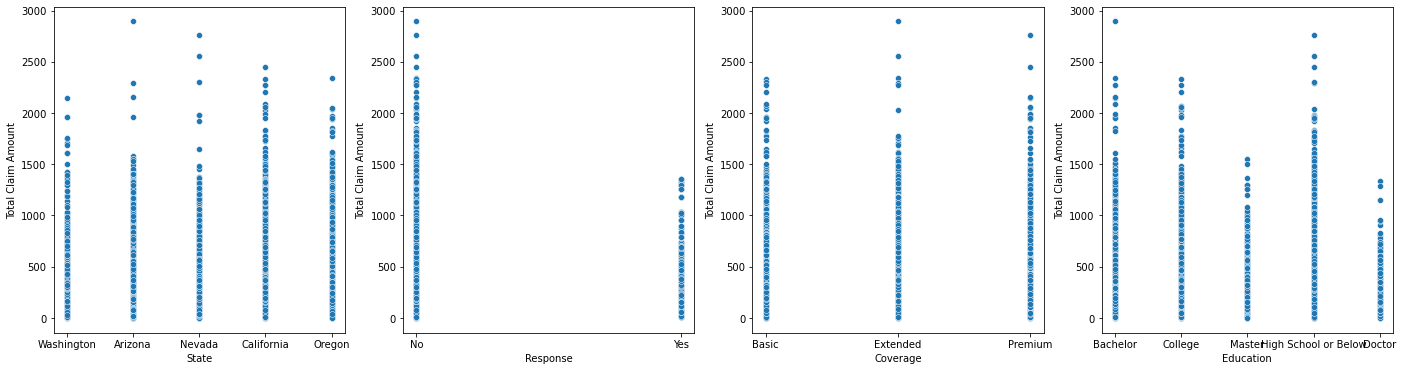

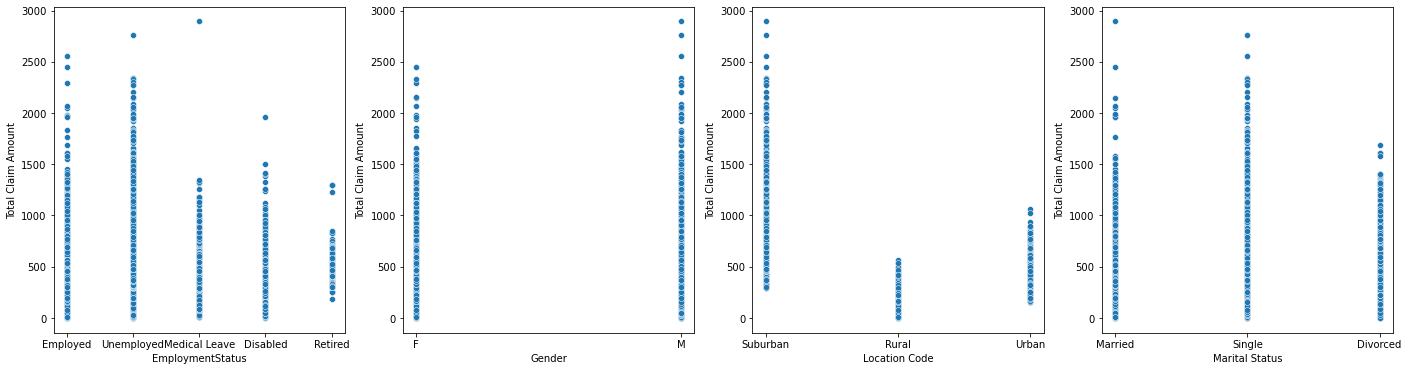

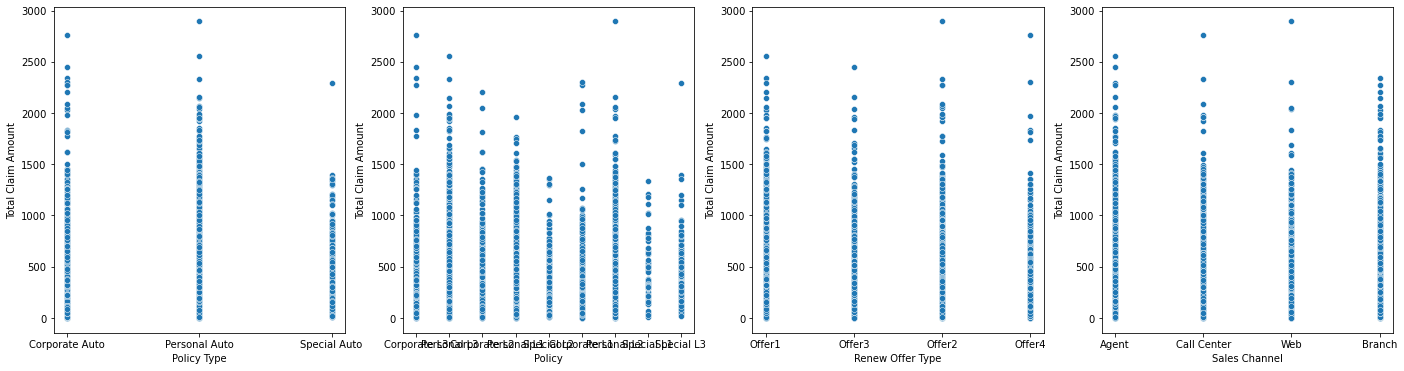

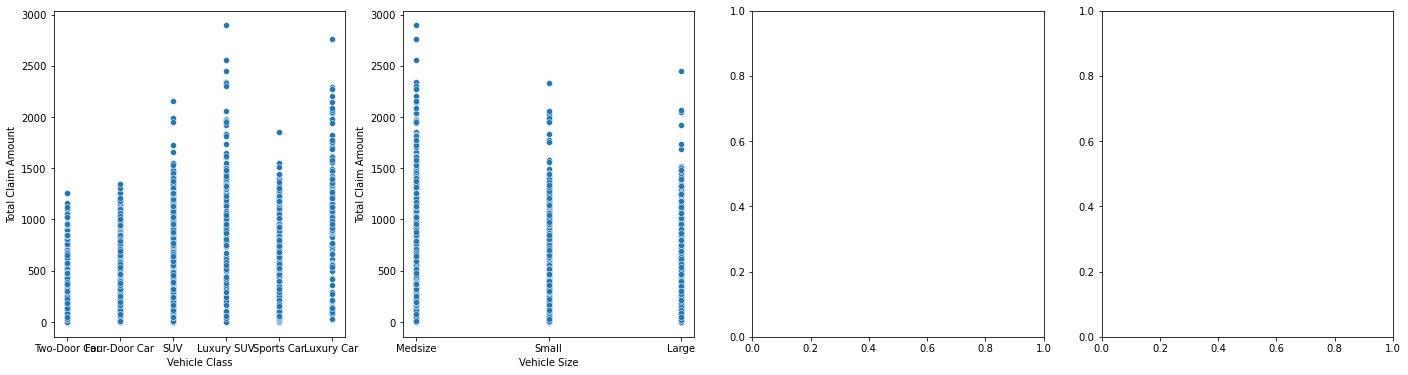

In [10]:
## Generate bivariate plots of these variables against Total Claims
## To identify any significant correlations with Total Claims
## If there are, then we should use them in our linear models
fig, ax = plt.subplots(1, 4, figsize = (24, 6))

for i in range(4):
    sns.scatterplot(
    x=categorical_var[i],
    y='Total Claim Amount',
#     hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax[i%4]
    )

fig2, ax2 = plt.subplots(1, 4, figsize = (24, 6))
for i in range(4, 8):
    sns.scatterplot(
    x=categorical_var[i],
    y='Total Claim Amount',
#     hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax2[i%4]
    )
    
fig3, ax3 = plt.subplots(1, 4, figsize = (24, 6))
for i in range(8, 12):
    sns.scatterplot(
    x=categorical_var[i],
    y='Total Claim Amount',
#     hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax3[i%4]
    )

fig4, ax4 = plt.subplots(1, 4, figsize = (24, 6))
for i in range(12, len(categorical_var)):
    sns.scatterplot(
    x=categorical_var[i],
    y='Total Claim Amount',
#     hue='EmploymentStatus',
    data=data, 
    #scatter='true', 
    ci=95,
    ax=ax4[i%4]
    )
# # Heat map
# fig, ax = plt.subplots(1, 2, figsize = (14, 10))
# cmap = sns.cm.rocket_r
# sns.heatmap(data.pivot_table(values='Total Claim Amount',index='State',columns='Gender'), 
#             cmap=cmap,
#             ax=ax[0])
# sns.heatmap(data.pivot_table(values='Total Claim Amount',index='State',columns='Response'), 
#             cmap=cmap,
#             ax=ax[1])


There are marked differences in the range, min and max values of total claim amount for these variables:
* Response
* Standard Coverage
* Education
* Employment status
* Gender
* Location Code
* Marital Status
* Policy type
* Policy
* Vehicle Class
* Vehicle Size

In [11]:
# (Optional) Visualise grid plot to see if any of the above are correlated - if so, we can omit some correlated variables

# Extract data with only these variables
categorical_var.remove('State')
categorical_var.remove('Renew Offer Type')
categorical_var.remove('Sales Channel')

In [12]:
df1 = data[categorical_var]
df1

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Vehicle Class,Vehicle Size
0,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9129,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Four-Door Car,Medsize
9130,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize
9131,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Four-Door Car,Medsize
9132,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Four-Door Car,Large


## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
dataset_train, dataset_test = train_test_split(data, test_size=0.1)

In [15]:
dataset_train.head() 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6012,ZU88796,Arizona,2448.811216,No,Basic,Bachelor,1/21/11,Employed,F,87802,Urban,Married,63,2,43,5,1,Personal Auto,Personal L2,Offer2,Agent,173.899238,Four-Door Car,Small
8207,ZC97171,Arizona,7627.431532,No,Extended,High School or Below,2/15/11,Employed,F,60479,Rural,Single,96,1,44,0,3,Personal Auto,Personal L3,Offer3,Call Center,85.155359,Four-Door Car,Medsize
5408,NK82261,California,3199.703983,No,Extended,High School or Below,1/28/11,Unemployed,M,0,Suburban,Single,94,6,61,0,1,Personal Auto,Personal L3,Offer1,Agent,1121.876091,Two-Door Car,Large
2013,EL70257,California,8404.395122,No,Basic,High School or Below,1/1/11,Employed,F,48315,Suburban,Divorced,71,34,56,0,2,Personal Auto,Personal L1,Offer1,Agent,340.800000,Four-Door Car,Medsize
61,RU83859,California,8110.333139,No,Premium,Bachelor,1/22/11,Medical Leave,F,11489,Suburban,Married,105,4,50,0,6,Personal Auto,Personal L3,Offer1,Call Center,504.000000,Two-Door Car,Small


In [16]:
dataset_test.head() 

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3919,XV30885,California,4595.524548,No,Basic,College,1/25/11,Employed,M,95550,Urban,Divorced,116,15,75,1,1,Personal Auto,Personal L3,Offer1,Agent,381.570261,SUV,Medsize
4576,KC16062,Arizona,7550.418650,No,Basic,High School or Below,1/15/11,Unemployed,F,0,Suburban,Married,100,20,48,0,6,Corporate Auto,Corporate L3,Offer1,Agent,480.000000,SUV,Small
8683,PV62467,California,4849.697945,No,Basic,College,1/27/11,Employed,F,36413,Rural,Married,61,21,76,0,3,Personal Auto,Personal L3,Offer1,Branch,153.013115,Four-Door Car,Medsize
324,JE21522,California,9587.332340,No,Extended,Bachelor,2/26/11,Employed,M,39266,Suburban,Married,80,33,31,0,2,Personal Auto,Personal L2,Offer4,Branch,384.000000,Four-Door Car,Medsize
4523,ZE42703,Nevada,4863.470811,No,Extended,Bachelor,2/4/11,Employed,M,52728,Suburban,Divorced,127,34,34,1,1,Corporate Auto,Corporate L3,Offer1,Branch,609.600000,SUV,Medsize


## 1. Simple Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [18]:
inputs = ['Customer Lifetime Value', 'Monthly Premium Auto', 
          'Income', 'Number of Open Complaints', 'Number of Policies'] + categorical_var
outputs = 'Total Claim Amount'
x_train = dataset_train[dataset_train.columns.intersection(inputs)]
y_train = dataset_train[outputs]

x_test = dataset_test[inputs]
y_test = dataset_test[outputs]

x_train.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Policy Type,Policy,Vehicle Class,Vehicle Size
6012,2448.811216,No,Basic,Bachelor,Employed,F,87802,Urban,Married,63,5,1,Personal Auto,Personal L2,Four-Door Car,Small
8207,7627.431532,No,Extended,High School or Below,Employed,F,60479,Rural,Single,96,0,3,Personal Auto,Personal L3,Four-Door Car,Medsize
5408,3199.703983,No,Extended,High School or Below,Unemployed,M,0,Suburban,Single,94,0,1,Personal Auto,Personal L3,Two-Door Car,Large
2013,8404.395122,No,Basic,High School or Below,Employed,F,48315,Suburban,Divorced,71,0,2,Personal Auto,Personal L1,Four-Door Car,Medsize
61,8110.333139,No,Premium,Bachelor,Medical Leave,F,11489,Suburban,Married,105,0,6,Personal Auto,Personal L3,Two-Door Car,Small


In [19]:
## Convert selected categorical variables into dummies (one-hot encoding)
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

x_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
6012,2448.811216,87802,63,5,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
8207,7627.431532,60479,96,0,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5408,3199.703983,0,94,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2013,8404.395122,48315,71,0,2,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
61,8110.333139,11489,105,0,6,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### Model training

In [20]:
# Train the model
regressor = LinearRegression()
# Fit the model
regressor.fit(X=x_train, y=y_train)


LinearRegression()

### Cross validation (k-fold)

We use cross validation scoring on the training data to provide a more accurate assessment of the trained model's actual performance, before using it on the test data.

Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

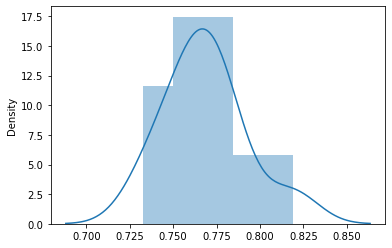

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, x_train, y_train, cv=10)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [22]:
# Get predictions
y_hat_train = regressor.predict(x_train)
y_hat_test = regressor.predict(x_test)

In [23]:
# Get the OLS regression statistics
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     766.6
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:44   Log-Likelihood:                -52262.
No. Observations:                8220   AIC:                         1.046e+05
Df Residuals:                    8183   BIC:                         1.049e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

The above shows the regression statistics from the OLS estimation. To analyse the statistical significance of the predictor variables, we look at the p-values. Around half of the predictors are not statistically significant at the 95% confidence level, such as Customer Lifetime Value, Number of Open Complaints, Number of policies.

This suggests that we can drop the variables with a p-value over 0.05, which will reduce the model's complexity and potentially its R-squared and in-sample fit.

In [24]:
parameters_df = pd.DataFrame(est2.params)
pvalues_df = pd.DataFrame(est2.pvalues)
# pvalues_df = pvalues_df.reset_index(drop= True)

# reset index
parameters_df.reset_index(inplace=True)
parameters_df = parameters_df.rename(columns = {0: 'Coef_estm'})
pvalues_df.reset_index(inplace=True)
pvalues_df = pvalues_df.rename(columns = {0: 'pvalue'})
pvalues_df

,index,pvalue
0,const,2.999691e-04
1,Customer Lifetime Value,2.625177e-01
2,Income,2.665543e-02
3,Monthly Premium Auto,3.561218e-112
4,Number of Open Complaints,1.195797e-01
5,Number of Policies,3.888163e-01
6,Response_No,5.213357e-01
7,Response_Yes,3.495636e-08
8,Coverage_Basic,9.287387e-01
9,Coverage_Extended,1.204706e-07


In [25]:
# parameters_df = parameters_df.append(pd.DataFrame(est2.pvalues))
ols_estimates = pd.merge(parameters_df,pvalues_df,how='inner',on='index')
ols_estimates

,index,Coef_estm,pvalue
0,const,-28.713537,2.999691e-04
1,Customer Lifetime Value,-0.000275,2.625177e-01
2,Income,-0.000200,2.665543e-02
3,Monthly Premium Auto,5.242326,3.561218e-112
4,Number of Open Complaints,-2.638049,1.195797e-01
5,Number of Policies,0.559087,3.888163e-01
6,Response_No,-2.913781,5.213357e-01
7,Response_Yes,-25.799755,3.495636e-08
8,Coverage_Basic,-0.316029,9.287387e-01
9,Coverage_Extended,-17.678059,1.204706e-07


In [26]:
# Slice table to get the variables with p-value <= 0.05
ols_estimates_sliced = ols_estimates[(ols_estimates['pvalue']<=0.05)]
ols_estimates_sliced
# get reduced set of predictors and store in array
inputs_reduced = ols_estimates_sliced['index'].tolist()
inputs_reduced.remove('const')
inputs_reduced

['Income',
 'Monthly Premium Auto',
 'Response_Yes',
 'Coverage_Extended',
 'Education_College',
 'Education_Doctor',
 'Education_High School or Below',
 'Education_Master',
 'EmploymentStatus_Disabled',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Gender_F',
 'Location Code_Rural',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single',
 'Policy Type_Corporate Auto',
 'Policy Type_Personal Auto',
 'Policy_Personal L2',
 'Policy_Personal L3',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Size_Medsize']

In [27]:
## Run another linear regression on inputs_reduced
# Get the OLS regression statistics
x_train_reduced = x_train[x_train.columns.intersection(inputs_reduced)]
 
x_train_reduced2 = sm.add_constant(x_train_reduced)
est_reduced = sm.OLS(y_train, x_train_reduced2)
est2_reduced = est_reduced.fit()
print(est2_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1147.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:44   Log-Likelihood:                -52275.
No. Observations:                8220   AIC:                         1.046e+05
Df Residuals:                    8195   BIC:                         1.048e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [28]:
#### Repeat the slicing: get only the variables on with p-value <= 0.05
param2_df = pd.DataFrame(est2_reduced.params)
pvalues2_df = pd.DataFrame(est2_reduced.pvalues)
# pvalues_df = pvalues_df.reset_index(drop= True)

# reset index
param2_df.reset_index(inplace=True)
param2_df = parameters_df.rename(columns = {0: 'Coef_estm'})
pvalues2_df.reset_index(inplace=True)
pvalues2_df = pvalues2_df.rename(columns = {0: 'pvalue'})
pvalues2_df

ols_estimates2 = pd.merge(param2_df,pvalues2_df,how='inner',on='index')
ols_estimates_sliced2 = ols_estimates2[(ols_estimates2['pvalue']<=0.05)]
ols_estimates_sliced2
# get reduced set of predictors and store in array
inputs_reduced2 = ols_estimates_sliced2['index'].tolist()
inputs_reduced2.remove('const')
inputs_reduced2

['Income',
 'Monthly Premium Auto',
 'Response_Yes',
 'Coverage_Extended',
 'Education_High School or Below',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Unemployed',
 'Gender_F',
 'Location Code_Rural',
 'Location Code_Suburban',
 'Marital Status_Divorced',
 'Marital Status_Married',
 'Marital Status_Single',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Size_Medsize']

In [29]:
## Run another linear regression on inputs_reduced2
# Get the OLS regression statistics
x_train2 = x_train[x_train.columns.intersection(inputs_reduced2)]
x_test2 = x_test[inputs_reduced2]
x_train_reduced_2 = sm.add_constant(x_train2)
est_reduced2 = sm.OLS(y_train, x_train_reduced_2)
est2_reduced2 = est_reduced2.fit()
print(est2_reduced2.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1833.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:44   Log-Likelihood:                -52281.
No. Observations:                8220   AIC:                         1.046e+05
Df Residuals:                    8204   BIC:                         1.047e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

The R^2 and adjusted R^2 values are almost identical (0.772 or 0.771) even after reducing the number of predictor variables for two iterations. This suggests that the first model with more predictor variables (50 estimated coefficients, including the constant term) did not add any in-sample predictive power while increasing the estimation error of each coefficient. Hence, we favour the most parsimonious model by selecting the third model using the following predictor variables:

In [30]:
print('Predictor variables to be used after reducing model complexity: \n', inputs_reduced2, len(inputs_reduced2), 'variables')

Predictor variables to be used after reducing model complexity: 
 ['Income', 'Monthly Premium Auto', 'Response_Yes', 'Coverage_Extended', 'Education_High School or Below', 'EmploymentStatus_Employed', 'EmploymentStatus_Unemployed', 'Gender_F', 'Location Code_Rural', 'Location Code_Suburban', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car', 'Vehicle Size_Medsize'] 16 variables


We perform 10-fold cross validation to get a measure of the second model's accuracy, which we will compare with that of the first model later.

Mean accuracy: 0.7689902827040422
Std accuracy: 0.022106258196099647


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

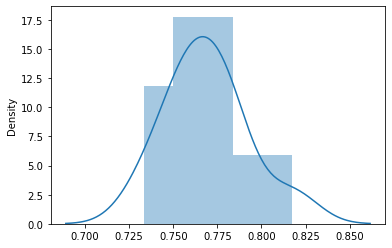

In [31]:
# Fit the model to the new set of variables
regressor.fit(X=x_train2, y=y_train)

scores = cross_val_score(regressor, x_train2, y_train, cv=10) #cv is the value of k (for 100<N<1000, K=10 is a good default)
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Std accuracy: {np.std(scores)}')
sns.distplot(scores)

In [32]:

# Get predictions
y_hat2_train = regressor.predict(x_train2)
y_hat2_test = regressor.predict(x_test2)

## Analysis of in-sample and out-of-sample results

### (i) Model 1 (49 predictor variables)

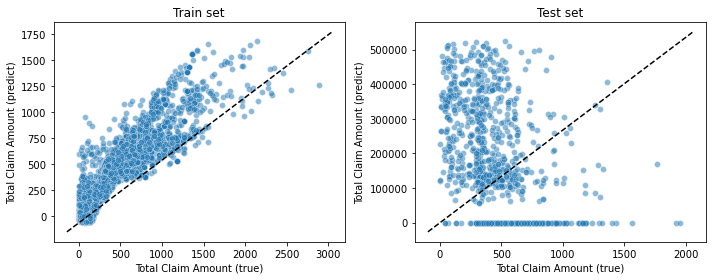

In [33]:
# Visualise the in-sample and out-of-sample fit for the original model with 49 predictors
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train,
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test,
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
#     a.set_xlim(1.5*10**5, 10**6)
#     a.set_ylim(1.5*10**5, 10**6)
    a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### Model 2 (17 predictor variables)

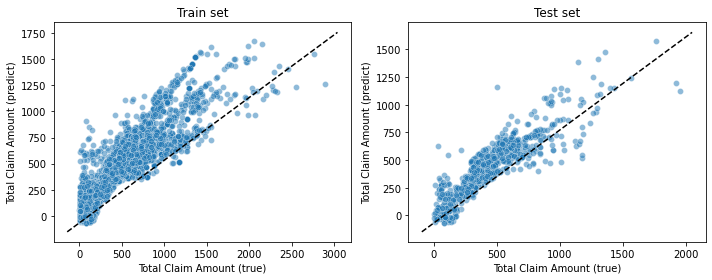

In [34]:
# Visualise the in-sample and out-of-sample fit for the second model with 18 predictors
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train,
    y=y_hat2_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test,
    y=y_hat2_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
#     a.set_xlim(1.5*10**5, 10**6)
#     a.set_ylim(1.5*10**5, 10**6)
    a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### Root Mean Squared Error

To quantify the accuracy of the 2 linear regression models, we use the root mean squared error(RMSE).

In [35]:
# get model coefficients
coeff = regressor.coef_

# get rmse for linear regression model 1 and model 2
from sklearn.metrics import mean_squared_error
def rmse_scaled(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) #get the RMSE
    scale = np.sqrt(np.mean(y_true**2))
    return rmse/scale ## Normalised RMSE
print(
    f'Scaled RMSE for model 1(49 predictors): \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)'
)
print(
    f'Scaled RMSE for model 2(17 predictors): \n {rmse_scaled(y_train, y_hat2_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat2_test)} (Test)'
)

Scaled RMSE for model 1(49 predictors): 
 0.2669803227943593 (Train)     
 483.59317027350045 (Test)
Scaled RMSE for model 2(17 predictors): 
 0.2676095587790322 (Train)     
 0.2532812843851324 (Test)


Both models produce an almost identitcal in-sample fit, but the out-of-sample RMSE is much larger for the first model (483.75) than the second model (0.266). This suggests the first model suffers from overfitting, due to the need to estimate many more coefficients which will increase its estimation error and variance. 

## 2. Kernel Ridge Regression

The second linear regression model performed decently well, but the figure above shows that there are still many points that are not lying on the 45 degree line - suggesting that the relationships between the predictor variables and the response variable could be nonlinear. To capture these nonlinear relationships, we use a kernel to map the dataset (d dimensions) into a feature space, so that we can use a linear model on the new feature space. 

In [36]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np

#### 2.1 Linear Kernel

In [37]:
# Scale the input data to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
scaler.fit(x_test)
# print(
#     f'Training data:\nMax: {scaler.data_max_}\nMin: {scaler.data_min_}\nRange: {scaler.data_range_}'
# )

MinMaxScaler()

In [38]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Cross Validation

We perform 10-fold cross validation to select the best value of alpa, the regularisation parameter that controls the variance of our model estimates.

In [39]:
# Store possible values of alpha in an array
alphas = [0.001, 0.005, 0.1, 0.5, 1.0, 5.0, 7.5, 10.0]

In [40]:
        ### MODEL 1: 49 predictors ####
# Create array to store CV scores for all 8 possible values of alpha
cvscores_linkernel = []
#Loop through alphas 
for a in alphas:
    linear_kernel = KernelRidge(alpha=a, kernel="linear")
    # Fit the model to the new set of variables
    linear_kernel.fit(X=x_train_scaled, y=y_train)
    scores = cross_val_score(regressor, x_train, y_train, cv=10) #cv is the value of k (for 100<N<1000, K=10 is a good default)
    cvscores_linkernel.append(scores)
    
# print(f'Mean accuracy: {np.mean(scores)}')
# print(f'Std accuracy: {np.std(scores)}')
# sns.distplot(scores)

Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

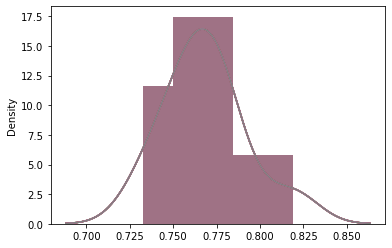

In [41]:
for scores in cvscores_linkernel:
    print(f'Mean accuracy: {np.mean(scores)}')
    print(f'Std accuracy: {np.std(scores)}')
    sns.distplot(scores)  #All are the same

Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989
Mean accuracy: 0.7683732990127163
Std accuracy: 0.02239624927880989


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

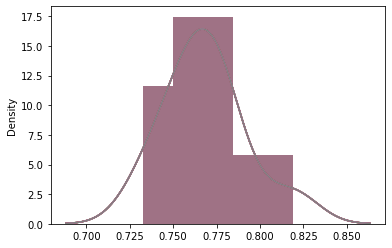

In [42]:
### MODEL 2: 17 predictors ####
# Scale data
scaler2 = MinMaxScaler()
scaler2.fit(x_train2)
scaler2.fit(x_test2)

x_train_scaled2 = scaler2.transform(x_train2)
x_test_scaled2 = scaler2.transform(x_test2)

# Create array to store CV scores for all 8 possible values of alpha
cvscores_linkernel2 = []
#Loop through alphas 
for a in alphas:
    linear_kernel = KernelRidge(alpha=a, kernel="linear")
    # Fit the model to the new set of variables
    linear_kernel.fit(X=x_train_scaled2, y=y_train)
    scores = cross_val_score(regressor, 
                             x_train_scaled2, 
                             y_train, 
                             scoring='neg_root_mean_squared_error',
                             cv=10) #cv is the value of k (for 100<N<1000, K=10 is a good default)
    cvscores_linkernel2.append(scores)

for scores in cvscores_linkernel:
    print(f'Mean accuracy: {np.mean(scores)}')
    print(f'Std accuracy: {np.std(scores)}')
    sns.distplot(scores) #All are the same


In [43]:
x_test_scaled2.size

14624

#### Make predictions

After cross validation, we select the value of alpha that yields the best CV score 

In [44]:
        #### MODEL 1 ####
#Fit linear kernel ridge regression
linear_kernel = KernelRidge(alpha=0.1, kernel="linear")
linear_kernel.fit(x_train_scaled, y_train)
#Make predictions in the training sample
y_khat_train = linear_kernel.predict(x_train_scaled)
#Make predictions in the test sample
y_khat_test = linear_kernel.predict(x_test_scaled)


In [45]:
        #### MODEL 2####
#Fit linear kernel ridge regression
linear_kernel = KernelRidge(alpha=0.1, kernel="linear")
linear_kernel.fit(x_train_scaled2, y_train)
#Make predictions in the training sample
y_khat_train2 = linear_kernel.predict(x_train_scaled2)
#Make predictions in the test sample
y_khat_test2 = linear_kernel.predict(x_test_scaled2)

## Analysis of in-sample and out-of-sample results

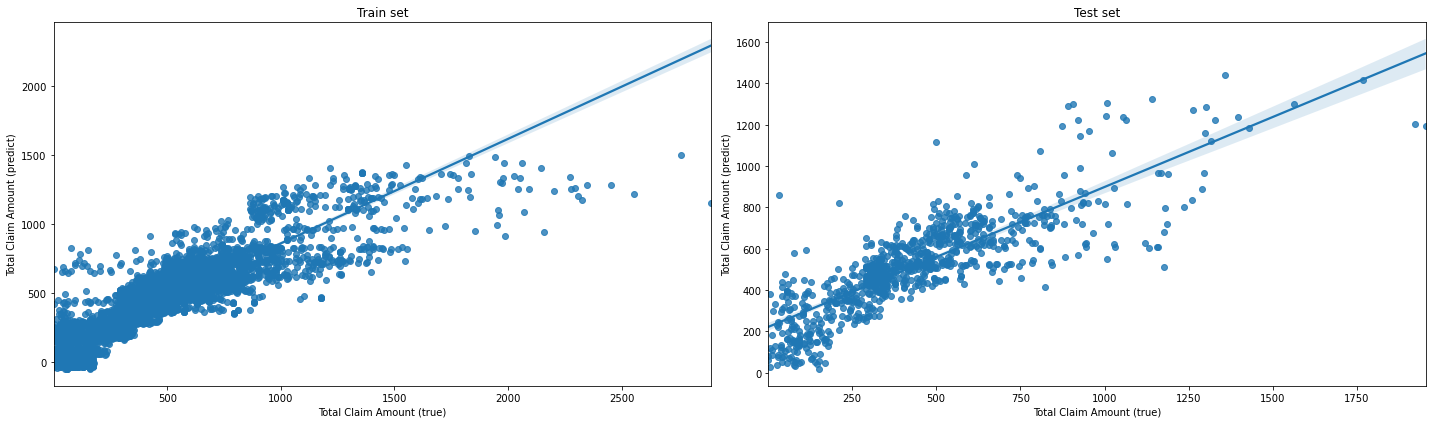

In [46]:
        #### MODEL 1 (49 predictors) ####
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=y_khat_train,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=y_khat_test,
    data=dataset_test,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

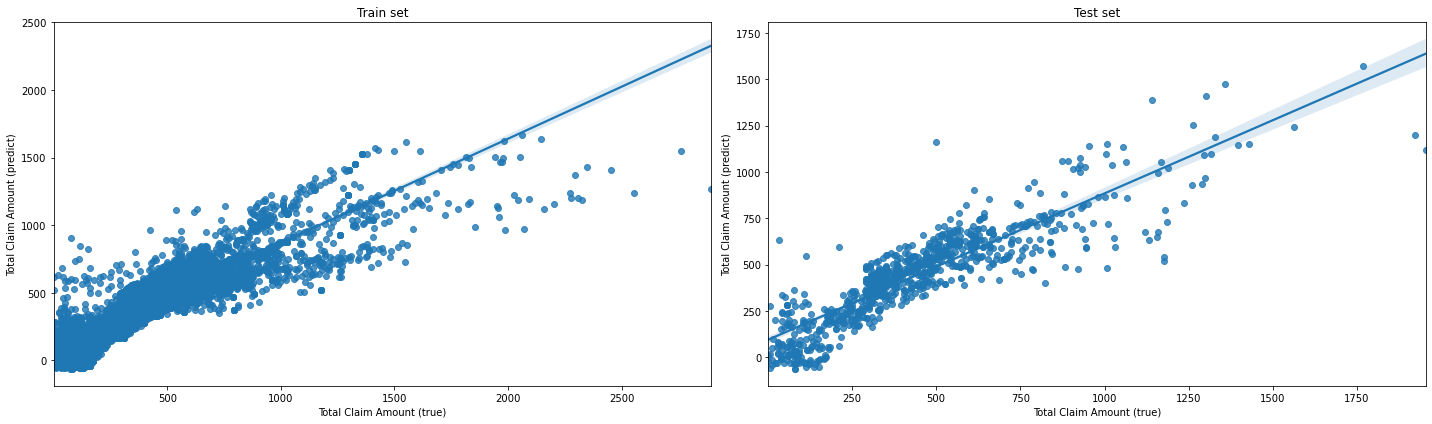

In [47]:
        #### MODEL 2 (17 predictors) ####
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=y_khat_train2,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=y_khat_test2,
    data=dataset_test,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [48]:
print(
    f'Scaled RMSE for linear kernel model 1: \n {rmse_scaled(y_train, y_khat_train)} (Train) \
    \n {rmse_scaled(y_test, y_khat_test)} (Test)'
)
print(
    f'Scaled RMSE linear kernel model 2: \n {rmse_scaled(y_train, y_khat_train2)} (Train) \
    \n {rmse_scaled(y_test, y_khat_test2)} (Test)'
)

Scaled RMSE for linear kernel model 1: 
 0.275367363506726 (Train)     
 0.3364693434092326 (Test)
Scaled RMSE linear kernel model 2: 
 0.2676096620145785 (Train)     
 0.2532670496264197 (Test)


As expected, reducing the number of variables improves the model's accuracy for both the in-sample and out-of-sample data. The out-of-sample RMSE for the second model is slightly higher than its in-sample RMSE, but almost identitcal, which shows that the model generalises well to the test data set. Both RMSEs are still not better than the RMSEs from the linear regression.

#### 2.2 Polynomial Kernel of degree 3

In [49]:
#Fit polynomial kernel ridge regression
poly_kernel = KernelRidge(alpha=1.0, kernel="polynomial", degree=3)
poly_kernel.fit(x_train_scaled, y_train)

KernelRidge(alpha=1.0, kernel='polynomial')

In [50]:
#Make predictions in the training sample
poly_yhat_train = poly_kernel.predict(x_train_scaled)

#Make predictions in the test sample
poly_yhat_test = poly_kernel.predict(x_test_scaled)

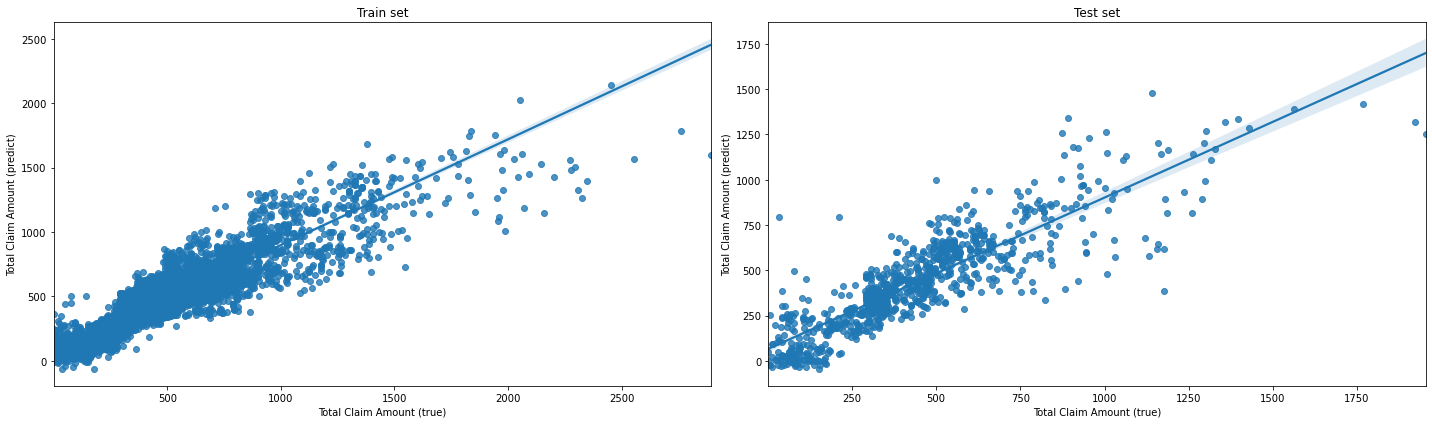

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=poly_yhat_train,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=poly_yhat_test,
    data=dataset_test,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

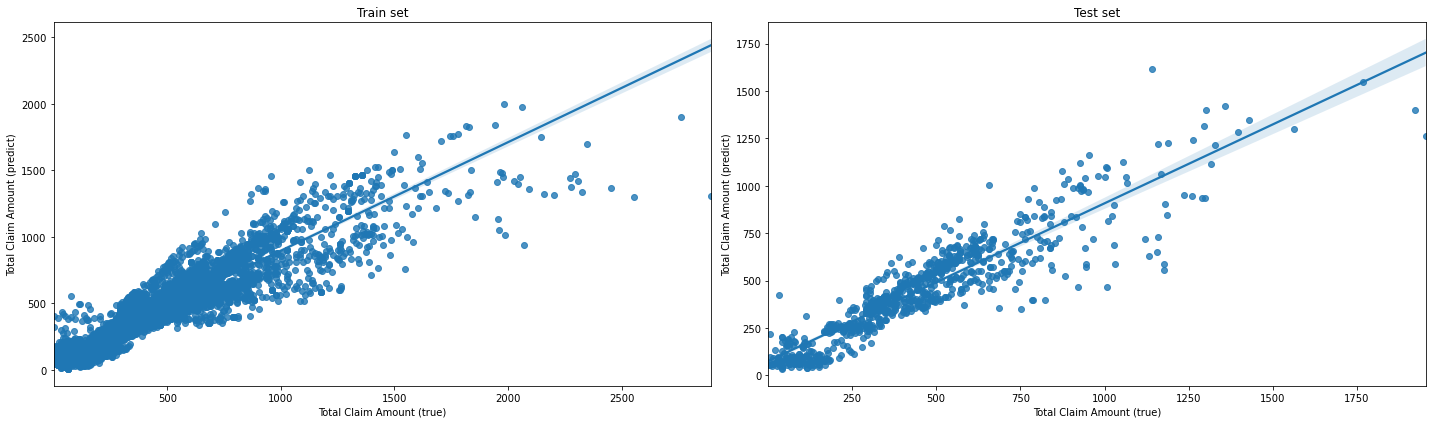

In [52]:
# Try for second model
poly_kernel.fit(x_train_scaled2, y_train)
#Make predictions in the training sample
poly_yhat_train2 = poly_kernel.predict(x_train_scaled2)

#Make predictions in the test sample
poly_yhat_test2 = poly_kernel.predict(x_test_scaled2)

fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=poly_yhat_train2,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=poly_yhat_test2,
    data=dataset_test,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [53]:
print(
    f'Scaled RMSE for polynomial kernel model 1: \n {rmse_scaled(y_train, poly_yhat_train)} (Train) \
    \n {rmse_scaled(y_test, poly_yhat_test)} (Test)'
)
print(
    f'Scaled RMSE for polynomial kernel model 2: \n {rmse_scaled(y_train, poly_yhat_train2)} (Train) \
    \n {rmse_scaled(y_test, poly_yhat_test2)} (Test)'
)

Scaled RMSE for polynomial kernel model 1: 
 0.2219873961233544 (Train)     
 0.26993816954382166 (Test)
Scaled RMSE for polynomial kernel model 2: 
 0.22670926010839584 (Train)     
 0.2167490215752571 (Test)


Similar to the previous results for the linear regression and linear kernel, the polynomial kernel models perform better with the reduced set of variables. In addition, the RMSE is significantly lower than the other models. 

#### 2.3 Radial Basis Function Kernel

In [54]:
#Fit kernel ridge regression - RBF
rbf_kernel = KernelRidge(alpha=1.0,kernel='rbf')
rbf_kernel.fit(x_train_scaled, y_train)

KernelRidge(alpha=1.0, kernel='rbf')

In [55]:
#Make predictions in the training sample
rbf_yhat_train = rbf_kernel.predict(x_train_scaled)

#Make predictions in the test sample
rbf_yhat_test = rbf_kernel.predict(x_test_scaled)

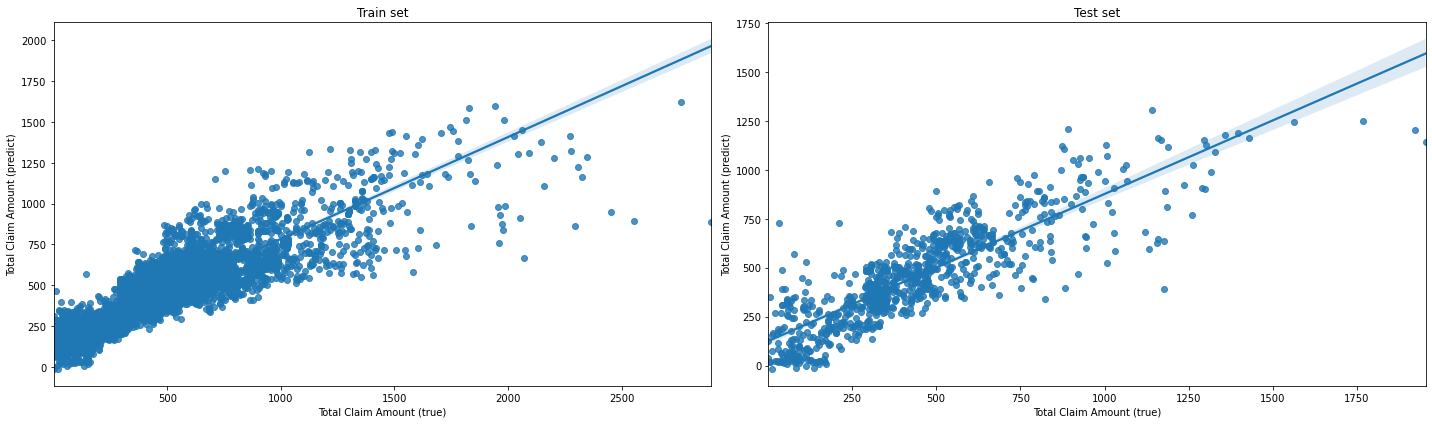

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=rbf_yhat_train,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=rbf_yhat_test,
    data=dataset_train,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

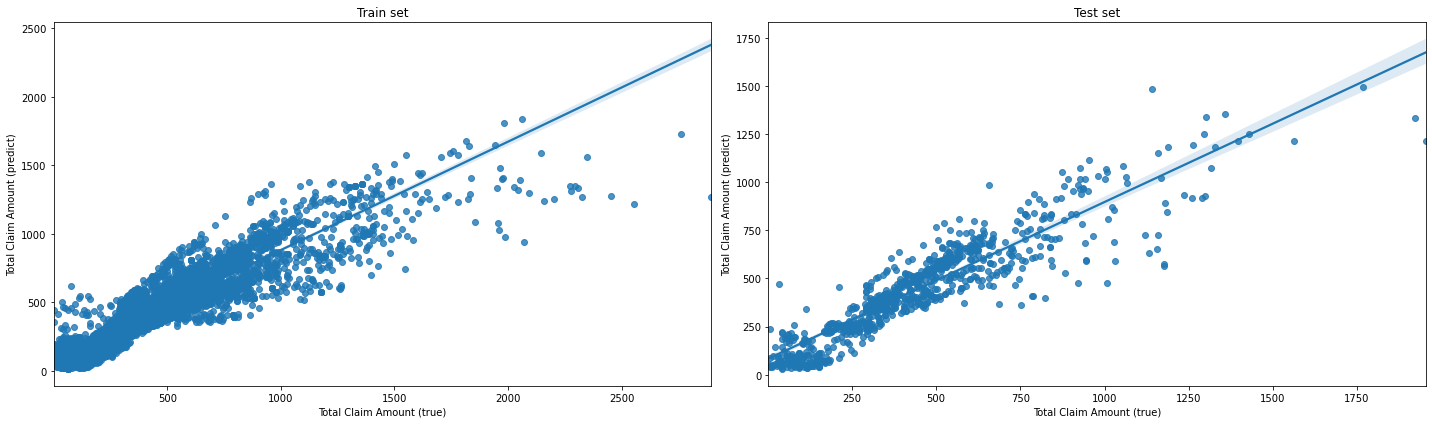

In [57]:
# Try for second model
rbf_kernel.fit(x_train_scaled2, y_train)
#Make predictions in the training sample
rbf_yhat_train2 = rbf_kernel.predict(x_train_scaled2)
#Make predictions in the test sample
rbf_yhat_test2 = rbf_kernel.predict(x_test_scaled2)
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=rbf_yhat_train2,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=rbf_yhat_test2,
    data=dataset_train,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [58]:
print(
    f'Scaled RMSE for RBF model 1: \n {rmse_scaled(y_train, rbf_yhat_train)} (Train) \
    \n {rmse_scaled(y_test, rbf_yhat_test)} (Test)'
)
print(
    f'Scaled RMSE for RBF model 2: \n {rmse_scaled(y_train, rbf_yhat_train2)} (Train) \
    \n {rmse_scaled(y_test, rbf_yhat_test2)} (Test)'
)

Scaled RMSE for RBF model 1: 
 0.28588260290797146 (Train)     
 0.28512848634946697 (Test)
Scaled RMSE for RBF model 2: 
 0.23270628946525637 (Train)     
 0.21986910031992146 (Test)


In [59]:
rmse_results = pd.DataFrame({'Train': [rmse_scaled(y_train, y_khat_train), rmse_scaled(y_train, rbf_yhat_train)]})
rmse_results

,Train
0,0.275367
1,0.285883


In [60]:
#create dataframe to store all rmses. First enter zeros in all entries
rmse_results_all = pd.DataFrame(np.zeros((8,2)),index='LinReg1 LinReg2 Kernel_lin1 Kernel_lin2 Kernel_poly1 Kernel_poly2 Kernel_rbf1 Kernel_rbf2'.split(),columns='train test'.split())
rmse_results_all
#Add values to each entry
rmse_results_all.iloc[0][0] = rmse_scaled(y_train, y_hat_train)
rmse_results_all.iloc[0][1] = rmse_scaled(y_test, y_hat_test)
rmse_results_all.iloc[1][0] = rmse_scaled(y_train, y_hat2_train)
rmse_results_all.iloc[1][1] = rmse_scaled(y_test, y_hat2_test)

rmse_results_all.iloc[2][0] = rmse_scaled(y_train, y_khat_train)
rmse_results_all.iloc[2][1] = rmse_scaled(y_test, y_khat_test)
rmse_results_all.iloc[3][0] = rmse_scaled(y_train, y_khat_train2)
rmse_results_all.iloc[3][1] = rmse_scaled(y_test, y_khat_test2)

rmse_results_all.iloc[4][0] = rmse_scaled(y_train, poly_yhat_train)
rmse_results_all.iloc[4][1] = rmse_scaled(y_test, poly_yhat_test)
rmse_results_all.iloc[5][0] = rmse_scaled(y_train, poly_yhat_train2)
rmse_results_all.iloc[5][1] = rmse_scaled(y_test, poly_yhat_test2)

rmse_results_all.iloc[6][0] = rmse_scaled(y_train, rbf_yhat_train)
rmse_results_all.iloc[6][1] = rmse_scaled(y_test, rbf_yhat_test)
rmse_results_all.iloc[7][0] = rmse_scaled(y_train, rbf_yhat_train2)
rmse_results_all.iloc[7][1] = rmse_scaled(y_test, rbf_yhat_test2)
rmse_results_all

,train,test
LinReg1,0.266980,483.593170
LinReg2,0.267610,0.253281
Kernel_lin1,0.275367,0.336469
Kernel_lin2,0.267610,0.253267
Kernel_poly1,0.221987,0.269938
Kernel_poly2,0.226709,0.216749
Kernel_rbf1,0.285883,0.285128
Kernel_rbf2,0.232706,0.219869


The **polynomial kernel ridge regression** shows the greatest in-sample and out-of-sample fit, as its RMSE is the lowest, followed by the **radial basis function kernel ridge regression**. The second model with the reduced set of 18 variables performs the best out-of-sample for both these kernels.

## 3. Decision Trees

Decision trees are widely used for both regression and classification problems due to the ease of understanding and interpreting their results. 

As decision trees are known to be prone to overfitting the training data due to the size of the tree becoming too large, we address this problem by doing the following:
1. Reduce the dimension of the input data i.e. the number of variables. Variable selection will be done through cross validation
2. Setting the max_depth and max_features

### 3.1 Simple model

We first try a simple model with max_depth=10 and the same 17 predictor variables. This is likely to be too large, and will be reduced later in the next models.

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(max_depth=10)
regressor_tree.fit(x_train_scaled2, y_train)

DecisionTreeRegressor(max_depth=10)

In [62]:
regressor_tree.score(x_train_scaled2, y_train)

0.8977967668925427

In [63]:
regressor_tree.score(x_test_scaled2, y_test)

0.7322051964474952

In [64]:
# Get in-sample predictions
yhat_train = regressor_tree.predict(x_train_scaled2)
# Get out-of-sample predictions
yhat_test = regressor_tree.predict(x_test_scaled2)
# Store actual versus predicted values in a dataframe
df_pred = pd.DataFrame({'actual': y_test, 'predicted': yhat_test})
df_pred

,actual,predicted
3919,381.570261,407.725850
4576,480.000000,596.438285
8683,153.013115,77.573487
324,384.000000,427.704422
4523,609.600000,708.809834
...,...,...
9057,321.600000,353.481430
6435,701.708239,608.200191
1828,423.286512,357.947104
1554,171.382890,222.249288


In [65]:
# Calculate RMSE
# Apply lambda function to new error column
df_pred['error'] = df_pred.apply(lambda x: x['actual'] - x['predicted'], axis=1)

# Calculate RMSE
mse = (df_pred['error'].apply(lambda x: x**2).sum()) / df_pred.count()
rmse = np.sqrt(mse)
rmse


actual       143.273393
predicted    143.273393
error        143.273393
dtype: float64

In [66]:
df_pred

,actual,predicted,error
3919,381.570261,407.725850,-26.155589
4576,480.000000,596.438285,-116.438285
8683,153.013115,77.573487,75.439628
324,384.000000,427.704422,-43.704422
4523,609.600000,708.809834,-99.209834
...,...,...,...
9057,321.600000,353.481430,-31.881430
6435,701.708239,608.200191,93.508048
1828,423.286512,357.947104,65.339408
1554,171.382890,222.249288,-50.866398


### Visualisation of decision tree model

In [67]:
from sklearn.tree import plot_tree

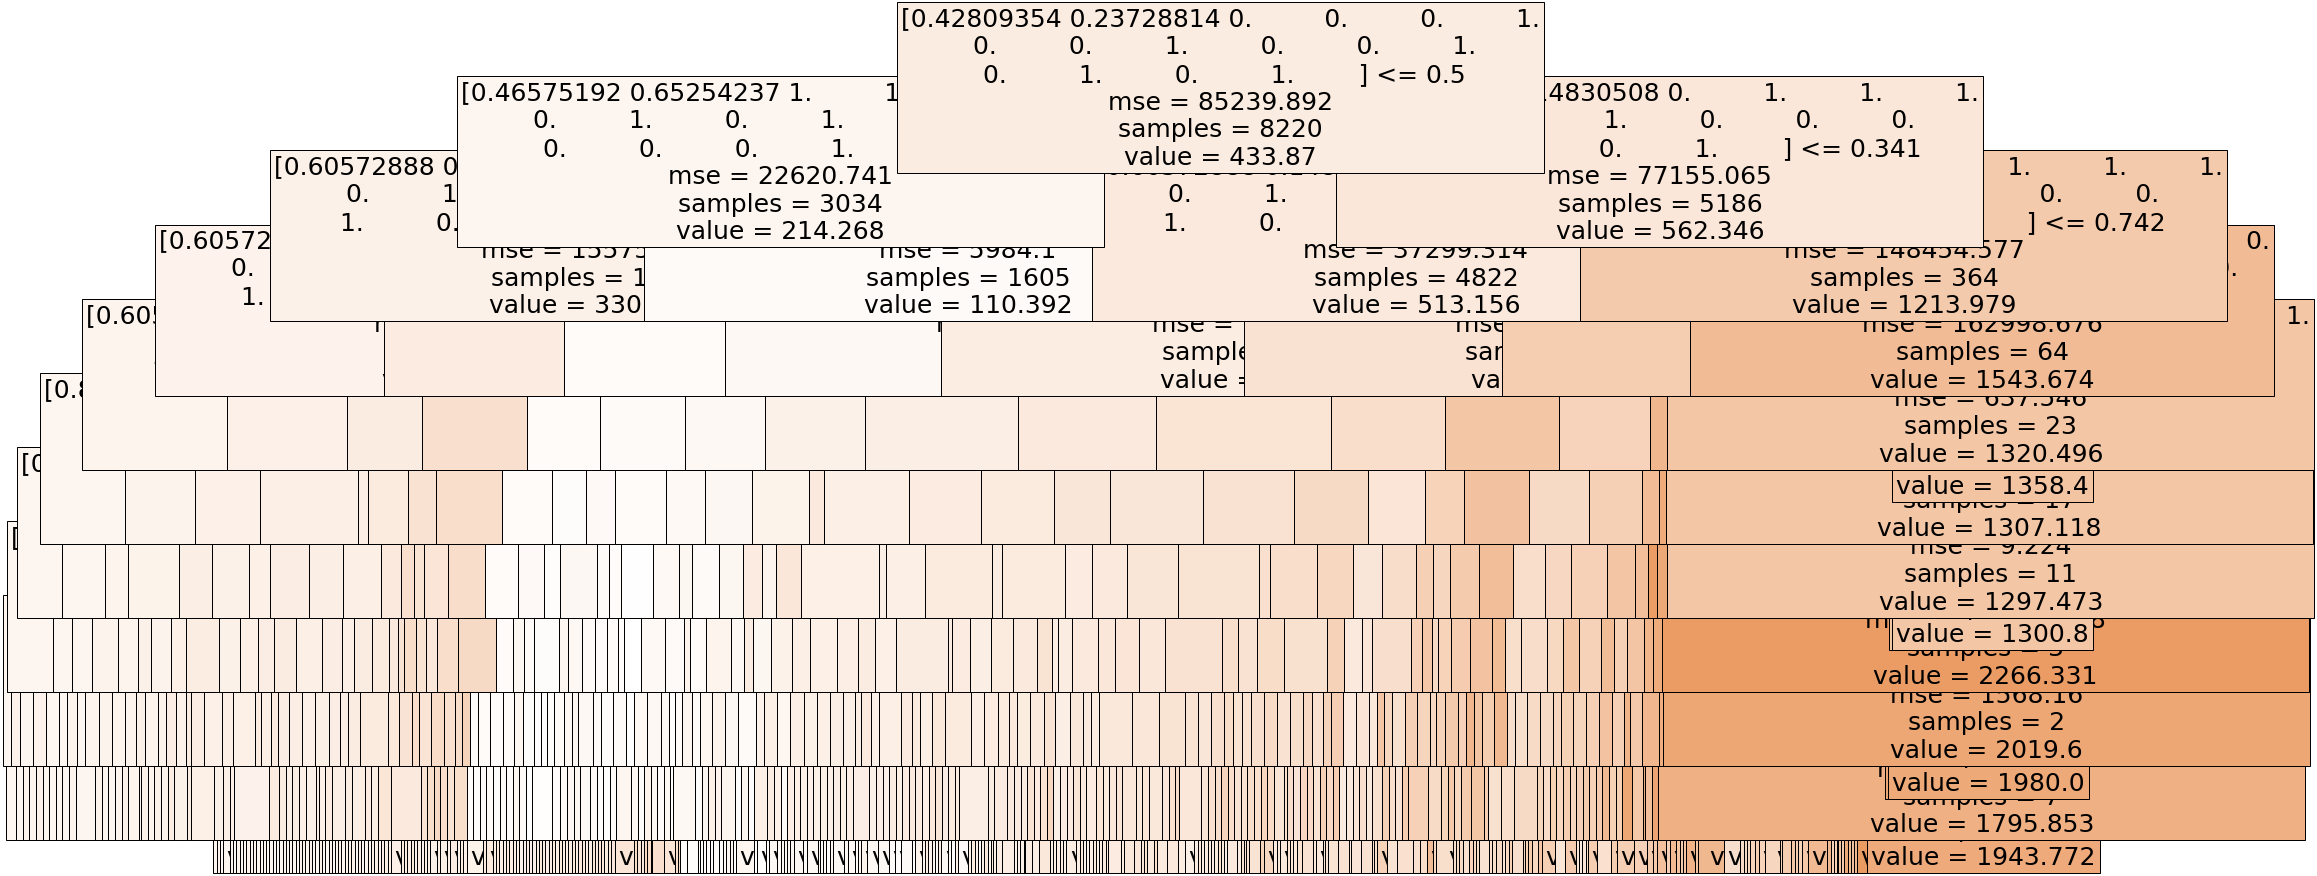

In [68]:
plt.figure(figsize=(30, 15))
plot_tree(
    regressor_tree,
    feature_names=x_train_scaled2,
    filled=True,
    fontsize=25
);

In [69]:
df_xtest = pd.DataFrame(x_test_scaled2)
df_xtest = df_xtest.reset_index()
df_xtest['index']

0        0
1        1
2        2
3        3
4        4
      ... 
909    909
910    910
911    911
912    912
913    913
Name: index, Length: 914, dtype: int64

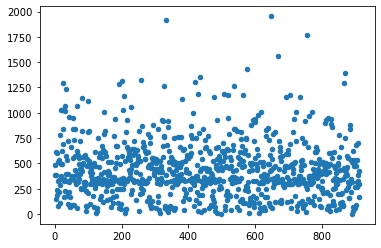

In [70]:
plt.scatter(df_xtest['index'], y_test, s=20, label = "data" )

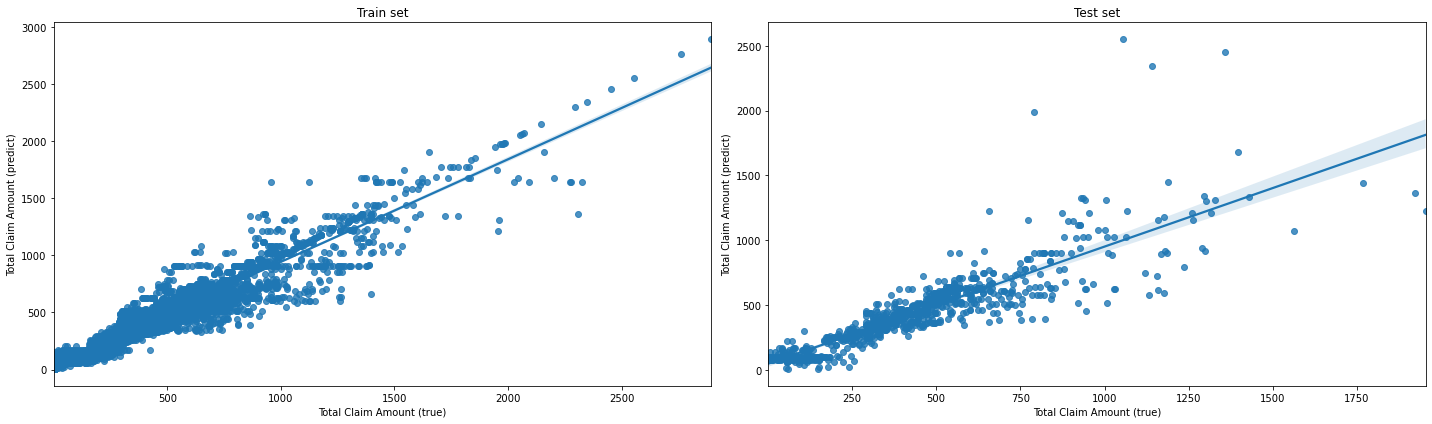

In [71]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=yhat_train,
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=yhat_test,
    data=dataset_train,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [72]:
print(
    f'Scaled RMSE for simple decision tree: \n {rmse_scaled(y_train, yhat_train)} (Train) \
    \n {rmse_scaled(y_test, yhat_test)} (Test)'
)

Scaled RMSE for simple decision tree: 
 0.178479454678265 (Train)     
 0.27738115050890605 (Test)


In [73]:
# Compare RMSE with the other models
df_temp = pd.DataFrame({'train': [rmse_scaled(y_train, yhat_train)], 
                        'test': [rmse_scaled(y_test, yhat_test)]},
                      index=['simple tree'])
rmse_results_all = rmse_results_all.append(df_temp)
rmse_results_all

,train,test
LinReg1,0.266980,483.593170
LinReg2,0.267610,0.253281
Kernel_lin1,0.275367,0.336469
Kernel_lin2,0.267610,0.253267
Kernel_poly1,0.221987,0.269938
Kernel_poly2,0.226709,0.216749
Kernel_rbf1,0.285883,0.285128
Kernel_rbf2,0.232706,0.219869
simple tree,0.178479,0.277381


The tendency for decision trees to overfit is shown in the training rmse (0.178), which is the smallest. However, it's test rmse does not outperform previous two best models, the Kernel polynomial regression model 2 and Kernel RBF regression model 2.

### 3.2 Finetuning the model
Now, we improve on the performance accuracy by reducing the number of variables and size of the tree.
* Number of variables
* Size of tree: max_depth and max_features

First, we check the feature importance (Gini importance) of each feature. 

In [74]:
# Get the feature importance and drop those that are very small 
regressor_tree.feature_importances_

array([4.57976541e-02, 4.67648672e-01, 8.98833286e-03, 4.71806364e-04,
       3.65038358e-03, 4.02857714e-04, 4.70044348e-03, 5.56016035e-03,
       5.84515623e-02, 3.68667630e-01, 5.50831024e-04, 8.10312423e-04,
       2.88709257e-02, 6.45434446e-04, 1.57858334e-04, 4.62513513e-03])

In [75]:
max_depth = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
max_features = [5, 10, 15, 16]
tree_models = {}
# create a nested dictionary to store properties of each tree model
for key in max_depth:
    new_dict = {}
    tree_models[key] = new_dict
    for dic in max_features:
        new_dict[dic] = {}
tree_models
# Later, the {} values will be filled with the score, in-sample predictions and out-of-sample predictions

{5: {5: {}, 10: {}, 15: {}, 16: {}},
 6: {5: {}, 10: {}, 15: {}, 16: {}},
 7: {5: {}, 10: {}, 15: {}, 16: {}},
 8: {5: {}, 10: {}, 15: {}, 16: {}},
 9: {5: {}, 10: {}, 15: {}, 16: {}},
 10: {5: {}, 10: {}, 15: {}, 16: {}},
 11: {5: {}, 10: {}, 15: {}, 16: {}},
 12: {5: {}, 10: {}, 15: {}, 16: {}},
 13: {5: {}, 10: {}, 15: {}, 16: {}},
 14: {5: {}, 10: {}, 15: {}, 16: {}},
 15: {5: {}, 10: {}, 15: {}, 16: {}}}

In [76]:
regressor_tree = DecisionTreeRegressor(max_depth=10)
regressor_tree.fit(x_train_scaled2, y_train)
regressor_tree.n_features_

16

In [77]:
from sklearn.tree import DecisionTreeRegressor
# Loop through all models to train the models 
for depth in max_depth:
    for num_feat in max_features:
        regressor_tree = DecisionTreeRegressor(max_depth=depth, max_features=num_feat)
        regressor_tree.fit(x_train_scaled2, y_train)
        # Get in-sample predictions
        yhat_train = regressor_tree.predict(x_train_scaled2)
        tree_models[depth][num_feat]['yhat_train'] = yhat_train
        # Get out-of-sample predictions
        yhat_test = regressor_tree.predict(x_test_scaled2)
        tree_models[depth][num_feat]['yhat_test'] = yhat_test
tree_models

{5: {5: {'yhat_train': array([287.22458683, 102.60523025, 616.46604302, ..., 287.22458683,
          287.22458683, 535.4380035 ]),
   'yhat_test': array([ 416.82338478,  871.43479185,  104.72565461,  474.63426331,
           592.78066259,  535.4380035 ,  147.65255225,  144.16633671,
           104.72565461,  535.4380035 ,  502.81192224,  287.22458683,
           616.46604302,  287.22458683,  102.60523025,  287.22458683,
           535.4380035 ,  535.4380035 ,  474.63426331,  645.22657154,
           535.4380035 ,  484.3477145 ,  535.4380035 ,  819.6813941 ,
           474.63426331,  474.63426331,  502.81192224,  203.40330546,
           474.63426331,  287.22458683, 1122.35979354,  714.057876  ,
           819.6813941 ,  474.63426331,  287.22458683,  616.46604302,
           535.4380035 ,  287.22458683,  474.63426331,  474.63426331,
           104.72565461,  474.63426331,  102.60523025,  535.4380035 ,
           287.22458683,  102.60523025,  104.72565461,  535.4380035 ,
           592.7

In [78]:
#### 10-fold CV on all models
for depth in max_depth:
    for num_feat in max_features:
        regressor_tree = DecisionTreeRegressor(max_depth=depth, max_features=num_feat)
        regressor_tree.fit(x_train_scaled2, y_train)
        scores = cross_val_score(regressor_tree,
                                 x_train_scaled2, 
                                 y_train, 
                                 scoring='neg_root_mean_squared_error',
                                 cv=10)
        tree_models[depth][num_feat]['cvscores'] = scores
        tree_models[depth][num_feat]['mean_cvscores'] = np.mean(scores)
        
tree_models

{5: {5: {'yhat_train': array([287.22458683, 102.60523025, 616.46604302, ..., 287.22458683,
          287.22458683, 535.4380035 ]),
   'yhat_test': array([ 416.82338478,  871.43479185,  104.72565461,  474.63426331,
           592.78066259,  535.4380035 ,  147.65255225,  144.16633671,
           104.72565461,  535.4380035 ,  502.81192224,  287.22458683,
           616.46604302,  287.22458683,  102.60523025,  287.22458683,
           535.4380035 ,  535.4380035 ,  474.63426331,  645.22657154,
           535.4380035 ,  484.3477145 ,  535.4380035 ,  819.6813941 ,
           474.63426331,  474.63426331,  502.81192224,  203.40330546,
           474.63426331,  287.22458683, 1122.35979354,  714.057876  ,
           819.6813941 ,  474.63426331,  287.22458683,  616.46604302,
           535.4380035 ,  287.22458683,  474.63426331,  474.63426331,
           104.72565461,  474.63426331,  102.60523025,  535.4380035 ,
           287.22458683,  102.60523025,  104.72565461,  535.4380035 ,
           592.7

In [79]:
tree_models[5][10]['mean_cvscores']

-136.14914310682752

In [89]:
# df to store cvscores
cvscores_df = pd.DataFrame(columns=max_features, index=max_depth)
cvscores_df

,5,10,15,16
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN


In [90]:
# loop to store cvscores in df
for depth in max_depth:
    for num_feat in max_features:
        mean_cvscores = tree_models[depth][num_feat]['mean_cvscores']
        cvscores_df[num_feat][depth] = mean_cvscores
# #         print(
# #            f'Depth {depth} and {num_feat} features : CV score: {mean_cvscores}'
# #         )
cvscores_df

,5,10,15,16
5,-170.985463,-136.149143,-131.962284,-129.384737
6,-159.724301,-131.735863,-125.840045,-125.240249
7,-149.233048,-127.5802,-125.187159,-125.793925
8,-141.098929,-128.114478,-130.628718,-127.309448
9,-146.115851,-129.723688,-132.853847,-133.393371
10,-136.251775,-137.744751,-135.970452,-137.116618
11,-139.180181,-138.499963,-142.951742,-143.440215
12,-139.988667,-141.921322,-141.586087,-146.487917
13,-145.004885,-148.648882,-152.095493,-149.222688
14,-149.10974,-154.188858,-151.051531,-152.899936


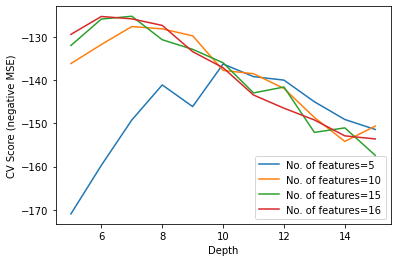

In [91]:
#### PLOT NEGATIVE CV MSE AGAINST DEPTH ####
for feature in max_features:
    plt.plot(cvscores_df[feature], label=f'No. of features={feature}')
    plt.xlabel('Depth')
    plt.ylabel('CV Score (negative MSE)')

plt.legend()
plt.show()

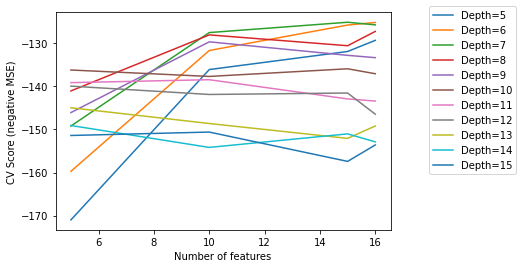

In [92]:
#### PLOT NEGATIVE CV MSE AGAINST NO. OF FEATURES (by row) ####
for index, row in cvscores_df.iterrows():
    plt.plot(row, label=f'Depth={index}')
    plt.xlabel('Number of features')
    plt.ylabel('CV Score (negative MSE)')

plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

The first graph above shows that the CV score is the highest (least negative MSE) at depth 6, for either 15 or 16 features. <br>Plotting the CV score against the number of features, the second graph shows that the CV score is the best for all depth levels when the tree is trained on 10 features. A slightly higher score can be obtained by training on 15 and 16 features, but the increase is very marginal. 
<br>We select the models with 10 features and depth 6 and test the model on the test data for evaluation.

### 3.3. Model Evaluation

In [85]:
# Get the best 2 CV models -> get predictions, get rmse for training and test data, then (i) compare with the CV score
# (ii) compare with the other models

In [98]:
# df to store train and test rmse
df_rmse_train = pd.DataFrame(columns=max_features, index=max_depth)
df_rmse_test = pd.DataFrame(columns=max_features, index=max_depth)

for depth in max_depth:
    for num_feat in max_features:
        yhat_train = tree_models[depth][num_feat]['yhat_train']
        yhat_test = tree_models[depth][num_feat]['yhat_test']
        #tree_models[depth][num_feat]['rmse_train'] = rmse_scaled(y_train, yhat_train)
        tree_models[depth][num_feat]['rmse_test'] = rmse_scaled(y_train, yhat_train)
        df_rmse_train[num_feat][depth] = rmse_scaled(y_train, yhat_train)
        df_rmse_test[num_feat][depth] = rmse_scaled(y_test, yhat_test)

        


In [99]:
df_rmse_train

,5,10,15,16
5,0.379439,0.253567,0.237197,0.237181
6,0.281546,0.245358,0.222898,0.222922
7,0.242185,0.23066,0.214924,0.21392
8,0.226089,0.207489,0.20233,0.202373
9,0.222996,0.193834,0.192229,0.191659
10,0.203456,0.191065,0.178698,0.178479
11,0.190044,0.166667,0.164357,0.164212
12,0.19991,0.150489,0.145147,0.151036
13,0.143133,0.137905,0.138284,0.136084
14,0.1474,0.124171,0.124528,0.123657


In [100]:
df_rmse_test

,5,10,15,16
5,0.342059,0.252549,0.2359,0.235959
6,0.279787,0.247503,0.23166,0.230833
7,0.230536,0.225737,0.24425,0.240435
8,0.234013,0.235542,0.254527,0.266479
9,0.242571,0.253506,0.257567,0.264789
10,0.251537,0.24666,0.280498,0.277061
11,0.26312,0.255675,0.266795,0.275845
12,0.273013,0.256617,0.288346,0.283711
13,0.250925,0.2454,0.279729,0.290907
14,0.28532,0.273443,0.295555,0.290159


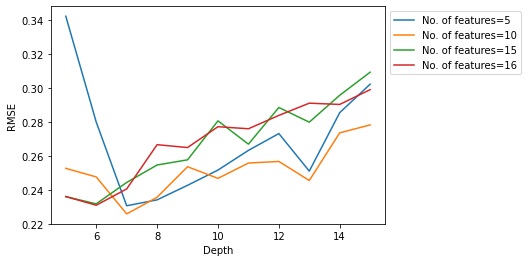

In [108]:
#### PLOT NEGATIVE CV MSE AGAINST DEPTH ####
for feature in max_features:
    plt.plot(df_rmse_test[feature], label=f'No. of features={feature}')
    plt.xlabel('Depth')
    plt.ylabel('RMSE')

plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

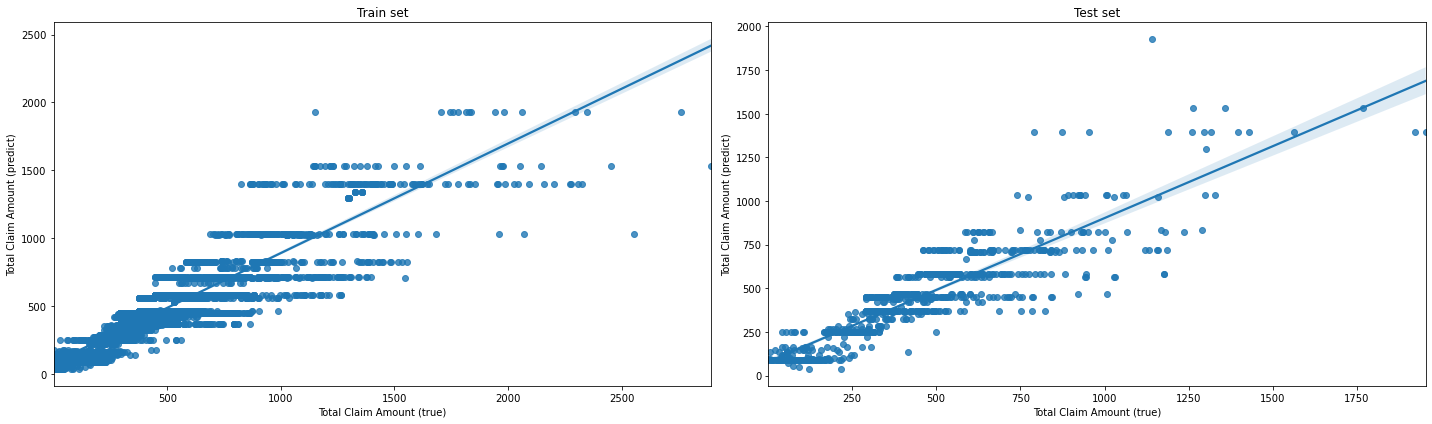

In [109]:
#plot the predictions
fig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.regplot(
    x=y_train,
    y=tree_models[6][10]['yhat_train'],
    data=dataset_train,
    ax=ax[0],
)

sns.regplot(
    x=y_test,
    y=tree_models[6][10]['yhat_test'],
    data=dataset_train,
    ax=ax[1],
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [121]:
rmse_results_all.drop(rmse_results_all.index[len(rmse_results_all) -1], inplace=True)
rmse_results_all

,train,test
LinReg1,0.26698,483.59317
LinReg2,0.26761,0.253281
Kernel_lin1,0.275367,0.336469
Kernel_lin2,0.26761,0.253267
Kernel_poly1,0.221987,0.269938
Kernel_poly2,0.226709,0.216749
Kernel_rbf1,0.285883,0.285128
Kernel_rbf2,0.232706,0.219869
simple tree,0.178479,0.277381


In [122]:
yhat_train = tree_models[6][10]['yhat_train']
yhat_test = tree_models[6][10]['yhat_test']

df_temp = pd.DataFrame({'train': [rmse_scaled(y_train, yhat_train)], 
                        'test': [rmse_scaled(y_test, yhat_test)]},
                      index=['cv_tree'])
rmse_results_all = rmse_results_all.append(df_temp)
rmse_results_all

,train,test
LinReg1,0.26698,483.59317
LinReg2,0.26761,0.253281
Kernel_lin1,0.275367,0.336469
Kernel_lin2,0.26761,0.253267
Kernel_poly1,0.221987,0.269938
Kernel_poly2,0.226709,0.216749
Kernel_rbf1,0.285883,0.285128
Kernel_rbf2,0.232706,0.219869
simple tree,0.178479,0.277381
cv_tree,0.245358,0.247503


The smaller tree selected from cross validation reduces the RMSE of the simple tree by approximately 0.03, to a value of 0.248. This is better than all other models except the best one (Kernel Polynomial Regression model).  

### (Optional) 3.3 Ensemble methods: Bagging (forecast averaging)

If one wishes to further improve on all the other model's performance, decision tree models can be combined to improve the predictions. One such method is bagging:
* Train ${m}$ models on random subsamples of the training data
* Make predictions for each model and average out their predictions. 
Theoretically, this method reduces the variance of the prediction errors by ${m}$ times while keeping the bias constant.

After performing this procedure to get the predictions, it will be later assessed for its performance with the other models. Also, we can compare the residuals (prediction errors) to determine whether this significant reduction in variance is actually achieved.